In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn

from datetime import datetime

# Data loading and preparation



In [2]:
data_path = '../data/dataset_SCL.csv'

df = pd.read_csv(data_path)

/var/folders/5s/vdx10l697jb5phtp2_z31l8m0000gn/T/ipykernel_51817/3483782913.py:3: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


In [3]:
# get the first 10 rows to get a basic notion about the data itself
df.head(10)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
5,2017-01-06 23:30:00,226,SCEL,KMIA,AAL,2017-01-07 00:04:00,226,SCEL,KMIA,AAL,7,1,2017,Sabado,I,American Airlines,Santiago,Miami
6,2017-01-07 23:30:00,226,SCEL,KMIA,AAL,2017-01-07 23:25:00,226,SCEL,KMIA,AAL,7,1,2017,Sabado,I,American Airlines,Santiago,Miami
7,2017-01-08 23:30:00,226,SCEL,KMIA,AAL,2017-01-08 23:25:00,226,SCEL,KMIA,AAL,8,1,2017,Domingo,I,American Airlines,Santiago,Miami
8,2017-01-09 23:30:00,226,SCEL,KMIA,AAL,2017-01-10 00:10:00,226,SCEL,KMIA,AAL,10,1,2017,Martes,I,American Airlines,Santiago,Miami
9,2017-01-11 23:30:00,226,SCEL,KMIA,AAL,2017-01-12 00:39:00,226,SCEL,KMIA,AAL,12,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


# Exploration data analysis (EDA)



In [5]:
f"Minimun date in the dataset {df['Fecha-I'].min()}. Max date in the dataset {df['Fecha-I'].max()}"

'Minimun date in the dataset 2017-01-01 00:15:00. Max date in the dataset 2017-12-31 23:55:00'

In [6]:
# I'd like to check how many or if there are null values
df.isnull().sum()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

<AxesSubplot:title={'center':'Most operated Airline'}, xlabel='count', ylabel='OPERA'>

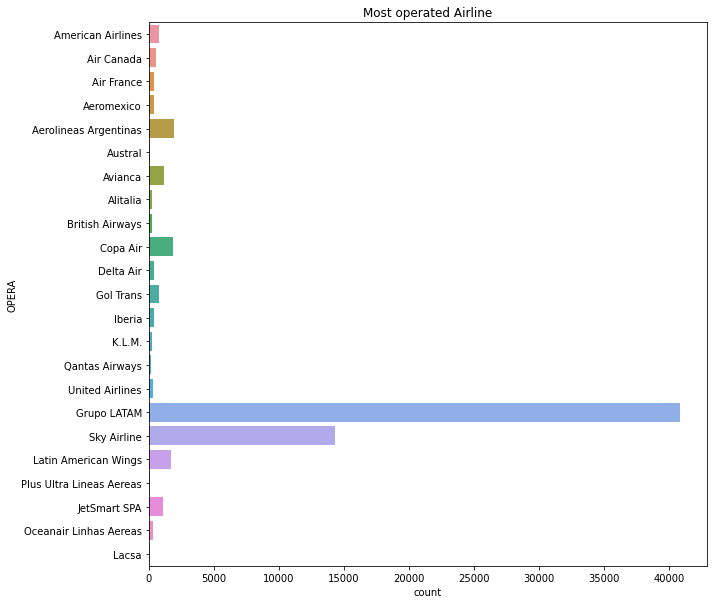

In [7]:
fig = plt.figure(figsize=(10, 10))
plt.title('Most operated Airline')
seaborn.countplot(y=df['OPERA'])

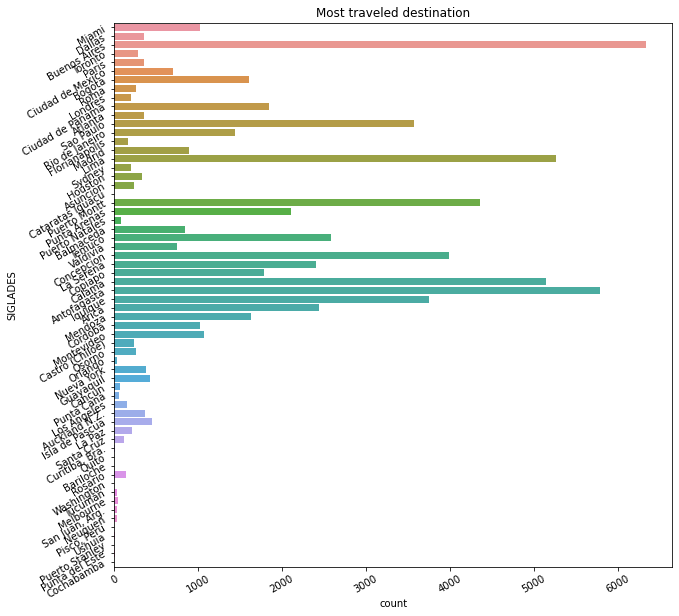

In [8]:
fig = plt.figure(figsize=(10, 10))
seaborn.countplot(y=df['SIGLADES'])
plt.title('Most traveled destination')
plt.tick_params(labelrotation=30)

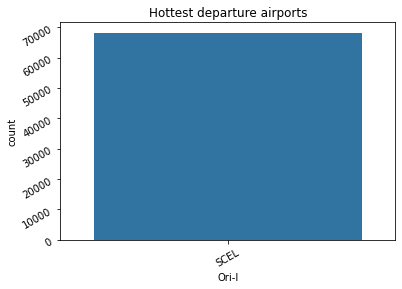

In [9]:
seaborn.countplot(x=df['Ori-I'])
plt.title('Hottest departure airports')
plt.tick_params(labelrotation=30)

### First Conclusions
* The most operated airles are Grupo Latam and Sky Airlines with at least 10000 opeartions. There are a few companies with at most 2500 opeartions. These results presented are between Junary and December of 2017.
* The dataset is biased or disvalanced realted to the departure airport. All the departures start from SCEL aiport (Santiago de Chile) thereby the predictions of the model will be related (or biased) from this departure city.

# Data transformation

In this section, I'll create new columns and save them into a new csv file.

The cell below has several functions that helps to solve the request actions.

In [41]:
def is_high_season(row):
    now_date = datetime.strptime(row['Fecha-I'],'%Y-%m-%d %H:%M:%S').date()
    
    if (now_date >= pd.to_datetime('2017-12-15') and now_date <= pd.to_datetime('2017-03-03'))\
    or (now_date >= pd.to_datetime('2017-07-15') and now_date <= pd.to_datetime('2017-07-31'))\
    or (now_date >= pd.to_datetime('2017-09-11') and now_date <= pd.to_datetime('2017-09-30')):
        return 1
    else:
        return 0

def flight_delay(row):
    # This function gets the difference between two dates and then convert the result to minutes.
    return (datetime.strptime(row['Fecha-O'],'%Y-%m-%d %H:%M:%S') - datetime.strptime(row['Fecha-I'],'%Y-%m-%d %H:%M:%S')).total_seconds()/ 60.0

def has_delay(row):
    # If dif_min is grater than 15 minutes we will asign 1 otherwise 0
    return 1 if row['dif_min'] > 15 else 0

def get_day_period(row):
    now_time = datetime.strptime(row['Fecha-I'],'%Y-%m-%d %H:%M:%S').time()
    
    if now_time >= datetime.strptime('5:00:00','%H:%M:%S').time() and now_time <= datetime.strptime('11:59:00','%H:%M:%S').time():
        return 'maniana'
    elif now_time >= datetime.strptime('12:00:00','%H:%M:%S').time() and now_time <= datetime.strptime('18:59:00','%H:%M:%S').time():
        return 'tarde'
    elif (now_time >= datetime.strptime('19:00:00','%H:%M:%S').time() and now_time <= datetime.strptime('23:59:00','%H:%M:%S').time()) or\
         (now_time >= datetime.strptime('00:00:00','%H:%M:%S').time() and now_time <= datetime.strptime('04:59:00','%H:%M:%S').time()):
        return 'noche'

In [26]:
df['temporada_alta'] = df.apply(lambda x: is_high_season(x), axis=1)

/var/folders/5s/vdx10l697jb5phtp2_z31l8m0000gn/T/ipykernel_51817/3483152240.py:4: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if (now_date >= pd.to_datetime('2017-12-15') and now_date <= pd.to_datetime('2017-03-03'))\
/var/folders/5s/vdx10l697jb5phtp2_z31l8m0000gn/T/ipykernel_51817/3483152240.py:5: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  or (now_date >= pd.to_datetime('2017-07-15') and now_date <= pd.to_datetime('2017-07-31'))\
/var/folders/5s/vdx10l697jb5phtp2_z31l8m0000gn/T/ipykernel_51817/3483152240.py:6: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in o

In [22]:
df['dif_min'] = df.apply(lambda x: flight_delay(x), axis=1)

In [23]:
df['atraso_15'] = df.apply(lambda x: has_delay(x), axis=1)

In [42]:
df['periodo_dia'] = df.apply(lambda x: get_day_period(x), axis=1)

### Saving the features
The cell bellow will dump the created features inside the data directory

In [44]:
path = '../data/synthetic_features.csv'

df[['temporada_alta', 'dif_min', 'atraso_15', 'periodo_dia']].to_csv(path)

# Delay time analysis
With the new data created I will analyze the delay behavior and how it is related to other fields.

 --- Variables que afectan los atrasos ... cuales pienso??
 
 --- relacion del atraso con:
 * destino
 * aerolineas
 * nes del año
 * dia de la semana
 * temporada
 * tipo de vuelo

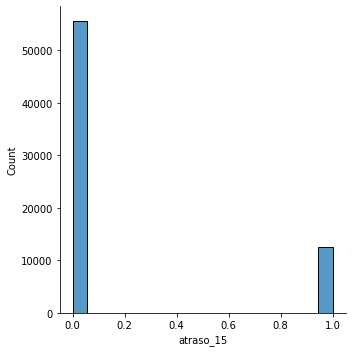

In [46]:
seaborn.displot(df['atraso_15'], aspect=1) #cambiar los bins=5,20 0 50 y ver...
## para evitar la notación científica en las etiquetas
plt.ticklabel_format(style='plain', axis='x')

